*6132-010402D Макарова Мария*

#Лабораторная работа №3
## Обработка бинарных изображений. Морфология.

1. Создать средствами OpenCV бинарное изображение с простым рисунком.
  *   Русунок из простых фигур: квадрат, круг и т.д.
2. Зашумить изображение импульсным шумом с вероятностью p (по вариантам).
  *   Вход: изображение из пункта 1
  *   Вывод: зашумленное изображение
3. Написать функции реализации эрозии и дилатации

> Функции вида fun(Image, struct)  
Где struct  - структурный элемент в виде матрицы

4. Выполнить операции эрозии и дилатации для зашумленного изображения со структурным элементом заданным по вариантам.
  *   Вход: изображение из пункта 2
  *   Вывод: Исходное (из пункта 1), зашумленное (из пункта 2) и  изображения после эрозии и дилатации.
5. Отфильтровать зашумленное изображение при помощи морфологических операций вскрытия и закрытия (структурный элемент задан по вариантам).  
Подсчитать коэффициент шума для результа фильтрации.
  *   Вход: изображение из пункта 2
  *   Вывод:  исходное (из пункта 1), зашумленное (из пункта 2) и  изображения после вскрытия и закрытия. Коэффициент шума.
  *   Коэффициент шума считать как количество несовпавших пикселей между отфильтрованным изображением и исходным (не зашумленным) из пункта 1.

6. Отфильтровать изображение при помощи логического фильтра. Подсчитать коэффициент шума для результа фильтрации.
  *   Вход: изображение из пункта 2
  *   Вывод: исходное (из пункта 1), зашумленное (из пункта 2) и отфильтрованное изображение. Коэффициент шума.
  *   Коэффициент шума считать как количество несовпавших пикселей между отфильтрованным изображением и исходным (не зашумленным) из пункта 1.
  *   Таблица логического фильтра в лекции.

7. На исходном изображении  с помощью морфологических операций выделить контур объекта. Выяснить, когда контур получается внешним, внутренним, четырёхсвязным, восьмисвязным.
  *   Вход: изображение из пункта 1
  *   Вывод: исходное изображение, изображение с выделенными контурами.

8. На исходном изображении  с помощью морфологических операций выделить горизонтальные и вертикальные контуры объекта.
  *   Вход: изображение из пункта 1
  *   Вывод: исходное изображение, изображение с выделенными горизонтальными контурами, изображение с выделенными вертикальными контурами.

  
    
    
*Для работы с изображением использовать OpenCV (открытие, сохранение и т.д.). Для визуализации можно использовать matplotlib. Все необходимые для задания функции реализовавать самим, а не использовать готовые в OpenCV, если не указано обратного.*
  
  
  

---



> По всем вопросам писать в ЛС в дискорде/tg ***volfgunus***




Ссылки на полезные ресурсы:

1.    [Документация OpenCV](https://docs.opencv.org/4.x/index.html)
1.    [Связанность пикселей](https://en.wikipedia.org/wiki/Pixel_connectivity)
1.    [Математическая морфология](https://en.wikipedia.org/wiki/Mathematical_morphology)



# Варианты задания


№ варианта | Вероятность p | Вид структурного элемента
--- | :---: | :---:
1 | 0,1 | крест 5×5
2 | 0,15 | квадрат 3×3
3 | 0,2 | крест 3×3
4 | 0,25 | квадрат 5×5
5 | 0,3 | квадрат 3×3
6 | 0,35 | крест 5×5
7 | 0,1 | крест 3×3
8 | 0,2 | квадрат 5×5
9 | 0,3 | крест 3×3
10 | 0,25 | крест 5×5
11 | 0,12 | квадрат 5×5
12 | 0,2 | крест 3×3
13 | 0,16 | квадрат 3×3
14 | 0,13 | квадрат 5×5
15 | 0,09 | квадрат 5×5
16 | 0,14 | крест 3×3
17 | 0,23 | квадрат 3×3
18 | 0,08 | крест3×3
19 | 0,1 | квадрат 3×3
20 | 0,11 | крест 5×5


# Контрольные темы

1. Бинарные изображения.
2. Основные операции математической морфологии.
3. Эрозия и дилатация.
4. Вскрытие изображения.
5. Закрытие изображения.
6. Выделение контуров на бинарном изображении.

# Вариант 15

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from numpy.fft import fft2, ifft2, ifftshift
from matplotlib import pyplot as plt
from scipy import signal
from tqdm.notebook import tqdm

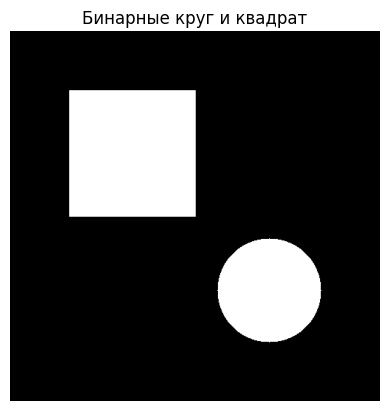

In [ ]:
# 1. Создать средствами OpenCV бинарное изображение с простым рисунком.

def show_image(image, title=None):
    plt.imshow(image, cmap='gray')
    if title:
        plt.title(title)
    plt.axis('off')
    plt.show()

image = np.zeros((500, 500, 3), dtype=np.uint8)

cv2.rectangle(image, (80, 80), (250, 250), (255, 255, 255), -1)
cv2.circle(image, (350, 350), 70, (255, 255, 255), -1)

#Преобразуем изображение в бинарное, оставляя только черные и белые пиксели
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, binary_image = cv2.threshold(gray_image, 1, 255, cv2.THRESH_BINARY)

show_image(binary_image, "Бинарные круг и квадрат")

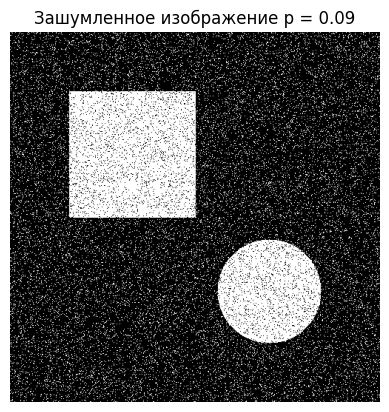

In [ ]:
# 3. Зашумить изображение импульсным шумом с вероятностью p (по вариантам).

def noise(img, p):
  rows, cols = img.shape
  noise = (np.random.rand(rows, cols) < p) * 255
  res = img + noise
  res[res > 255] = 0
  return res

image_noise = noise(binary_image, p=0.09)
show_image(image_noise, "Зашумленное изображение p = 0.09")

In [ ]:
# 3. Написать функции реализации эрозии и дилатации

def erosion(image, window):
  res_img = np.zeros_like(image)
  rows, cols = image.shape
  w_r, w_c = window.shape
  border = w_r // 2
  img_b = np.pad(image, (border, border), 'constant', constant_values=(255))
  window_w = window.sum()
  for i in range(border, rows + border):
    for j in range(border, cols + border):
      if (img_b[i-border:i+border+1, j-border:j+border+1] * window / 255).sum() == window_w:
        res_img[i - border, j - border] = 255
  return res_img

def dilation(image, window):
  res_img = np.zeros_like(image)
  rows, cols = image.shape
  w_r, w_c = window.shape
  border = w_r // 2
  img_b = np.pad(image, (border, border), 'constant', constant_values=(0))
  for i in range(border, rows + border):
    for j in range(border, cols + border):
      if (img_b[i-border:i+border+1, j-border:j+border+1] * window).sum() > 0:
        res_img[i - border, j - border] = 255
  return res_img

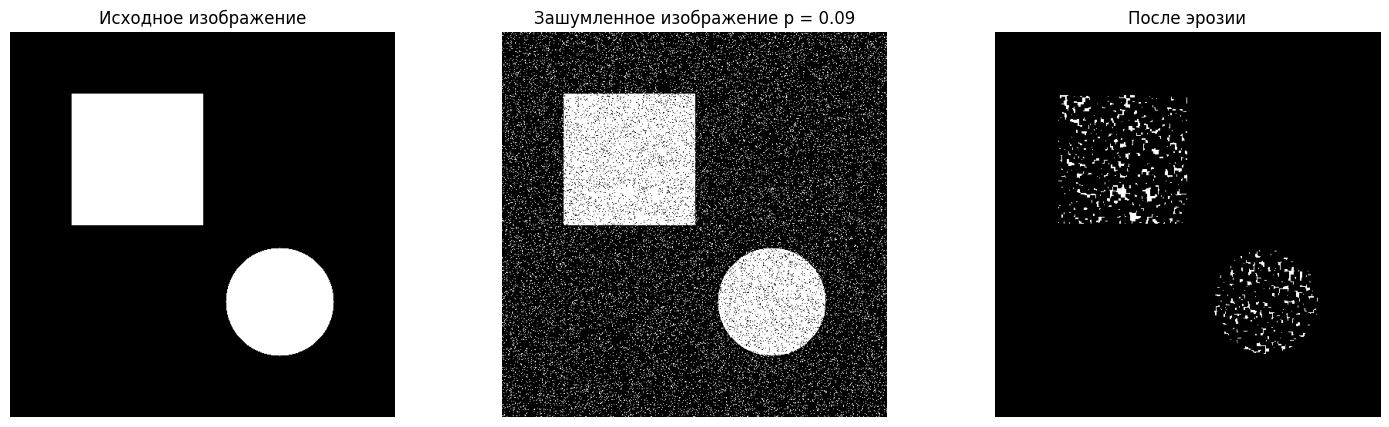

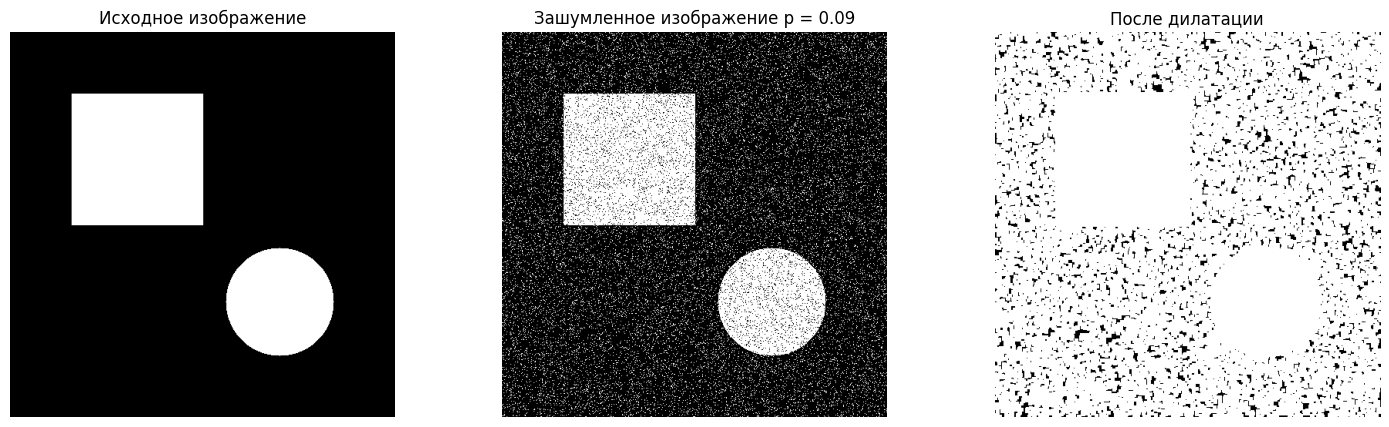

In [ ]:
# 4. Выполнить операции эрозии и дилатации для зашумленного изображения со структурным элементом заданным по вариантам.

def show_images(image, image_2, image_3, title=None, title_2=None, title_3=None):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

    ax1.imshow(image, cmap='gray')
    ax1.set_title(title)
    ax1.axis('off')

    ax2.imshow(image_2, cmap='gray')
    ax2.set_title(title_2)
    ax2.axis('off')

    ax3.imshow(image_3, cmap='gray')
    ax3.set_title(title_3)
    ax3.axis('off')
    plt.show()


window = np.ones((5, 5), dtype=np.uint8) #квадрат 5х5
image_erosion = erosion(image_noise, window)
show_images(binary_image,image_noise,image_erosion,title='Исходное изображение',title_2='Зашумленное изображение p = 0.09', title_3 = 'После эрозии')
image_dilation = dilation(image_noise, window)
show_images(binary_image,image_noise,image_dilation,title='Исходное изображение',title_2='Зашумленное изображение p = 0.09', title_3 = 'После дилатации')

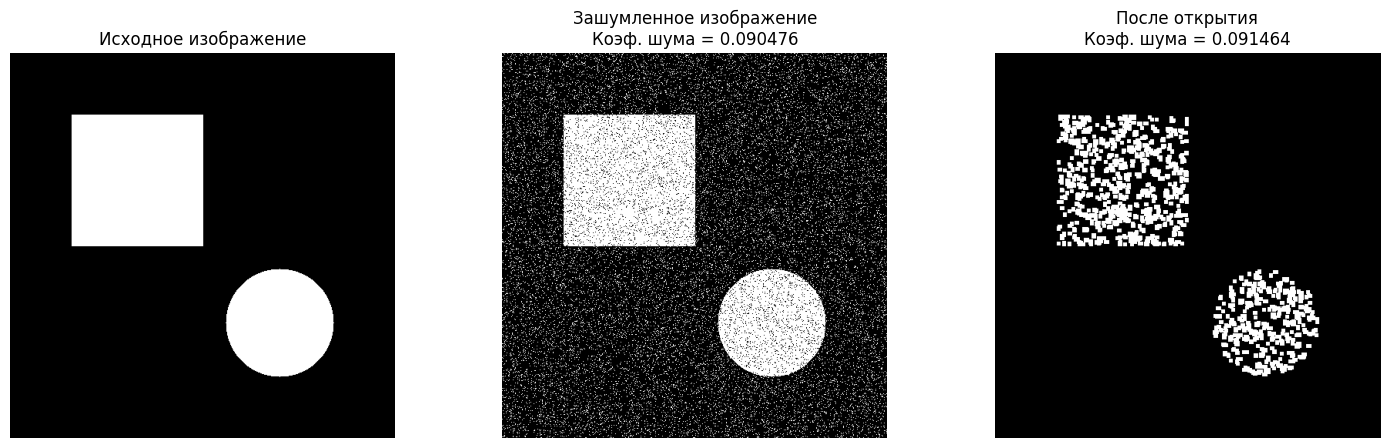

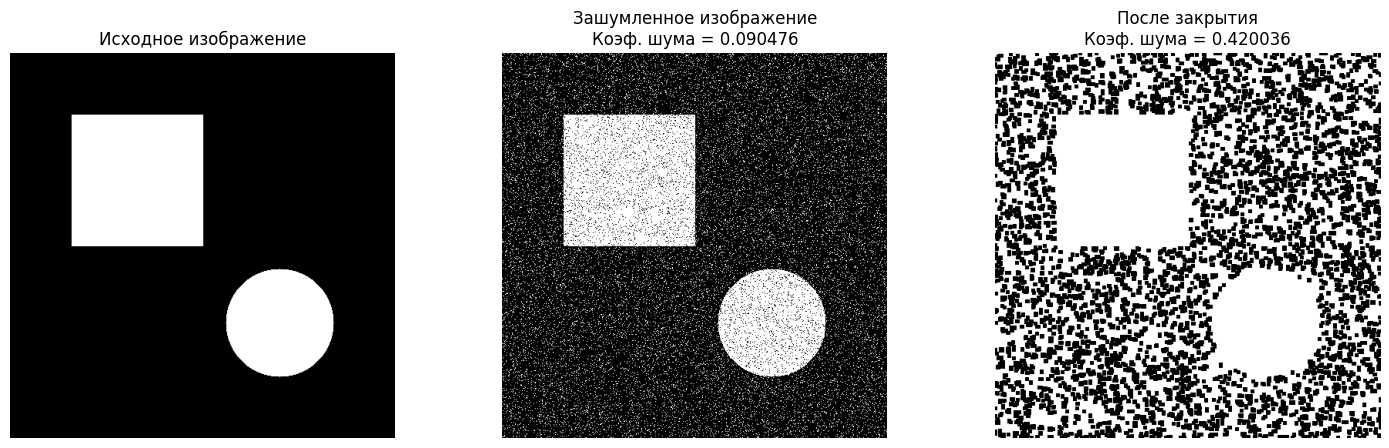

In [ ]:
# 5. Отфильтровать зашумленное изображение при помощи морфологических операций вскрытия и закрытия (структурный элемент задан по вариантам).
# Подсчитать коэффициент шума для результа фильтрации.

def opening(image, window):
  return dilation(erosion(image, window), window)

def closing(image, window):
  return erosion(dilation(image, window), window)

num_mismatched_pixels_noise = np.sum(binary_image != image_noise)
total_pixels = binary_image.shape[0] * binary_image.shape[1]
noise_coefficient_noise = num_mismatched_pixels_noise / total_pixels

image_open = opening(image_noise, window)
num_mismatched_pixels = np.sum(binary_image != image_open) #Подсчет количества несовпадающих пикселей
noise_coefficient = num_mismatched_pixels / total_pixels
show_images(binary_image,image_noise,image_open,title='Исходное изображение',title_2=f'Зашумленное изображение\nКоэф. шума = {noise_coefficient_noise}', title_3 = f'После открытия\nКоэф. шума = {noise_coefficient}')


image_close = closing(image_noise, window)
num_mismatched_pixels = np.sum(binary_image != image_close) #Подсчет количества несовпадающих пикселей
noise_coefficient = num_mismatched_pixels / total_pixels
show_images(binary_image,image_noise,image_close,title='Исходное изображение',title_2=f'Зашумленное изображение\nКоэф. шума = {noise_coefficient_noise}', title_3 = f'После закрытия\nКоэф. шума = {noise_coefficient}')

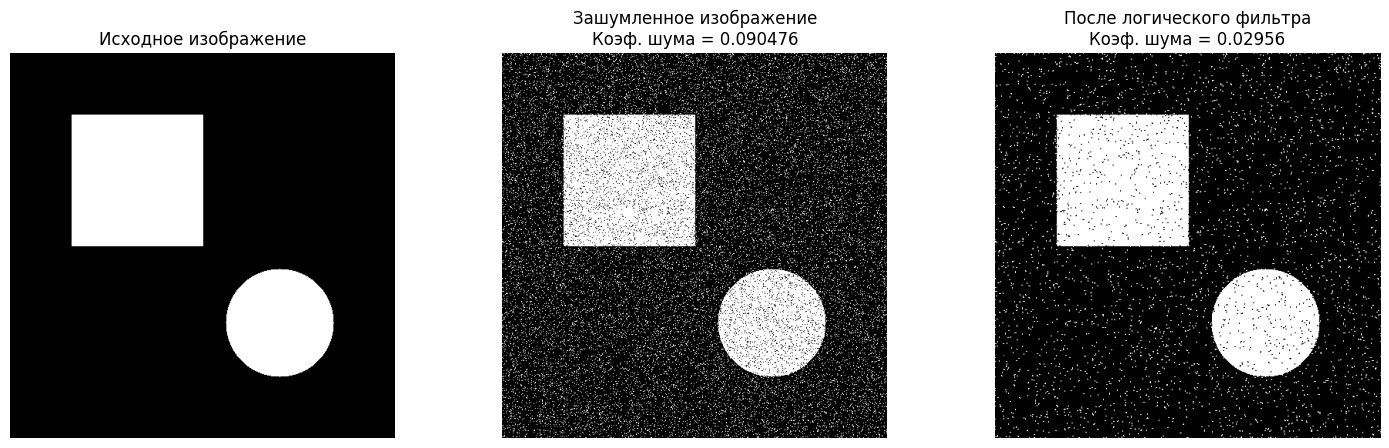

In [ ]:
# 6. Отфильтровать изображение при помощи логического фильтра. Подсчитать коэффициент шума для результа фильтрации.

def logic_filter(noiseImage: np.ndarray, window = np.array([[0,1,0],[1,1,1],[0,1,0]]), dtype=int):
    filteredImage = np.zeros_like(noiseImage, dtype=np.uint8)
    window_size_0 = window.shape[0] // 2
    window_size_1 = window.shape[1] // 2

    window = window.flatten()
    padded_noiseImage = np.pad(noiseImage, ((window_size_0, window_size_0), (window_size_1, window_size_1)), mode='edge')

    for i in range(filteredImage.shape[0]):
        for j in range(filteredImage.shape[1]):
            full_screen = padded_noiseImage[i:i + 2 * window_size_0 + 1, j:j + 2 * window_size_1 + 1].flatten()
            array_screen = []
            for l in range(len(full_screen)):
                for q in range(window[l]):
                    array_screen.append(full_screen[l])
            array_screen = np.array(array_screen)
            x_0 = array_screen[len(array_screen) // 2]
            array_screen = np.delete(array_screen, len(array_screen) // 2)
            res = int(x_0 and int(np.any(array_screen)))
            res2 = int((1 - x_0) and int(np.all(array_screen)))
            filteredImage[i, j] = int(res or res2)
    return filteredImage*255

logic_image = logic_filter(image_noise)
num_mismatched_pixels_logic = np.sum(binary_image != logic_image)
noise_coefficient_logic = num_mismatched_pixels_logic / total_pixels
show_images(binary_image, image_noise, logic_image, title='Исходное изображение', title_2=f'Зашумленное изображение\nКоэф. шума = {noise_coefficient_noise}', title_3=f'После логического фильтра\nКоэф. шума = {noise_coefficient_logic}')

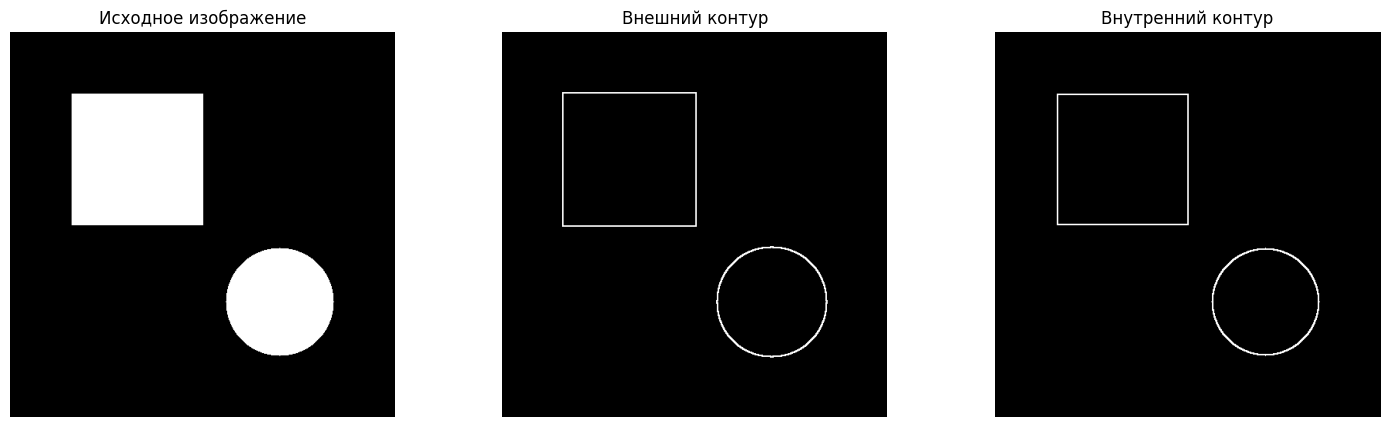

In [ ]:
# 7. На исходном изображении с помощью морфологических операций выделить контур объекта.
# Выяснить, когда контур получается внешним, внутренним, четырёхсвязным, восьмисвязным.

#внешний контур - дилатация, сложение по модулю 2
image_dil = dilation(binary_image, window)
external_countour = np.logical_xor(binary_image, image_dil)

#внутренний контур - эрозия, сложение по модулю 2
image_ero = erosion(binary_image, window)
inner_countour = np.logical_xor(binary_image, image_ero)

show_images(binary_image, external_countour, inner_countour, title='Исходное изображение',title_2='Внешний контур', title_3 = 'Внутренний контур')

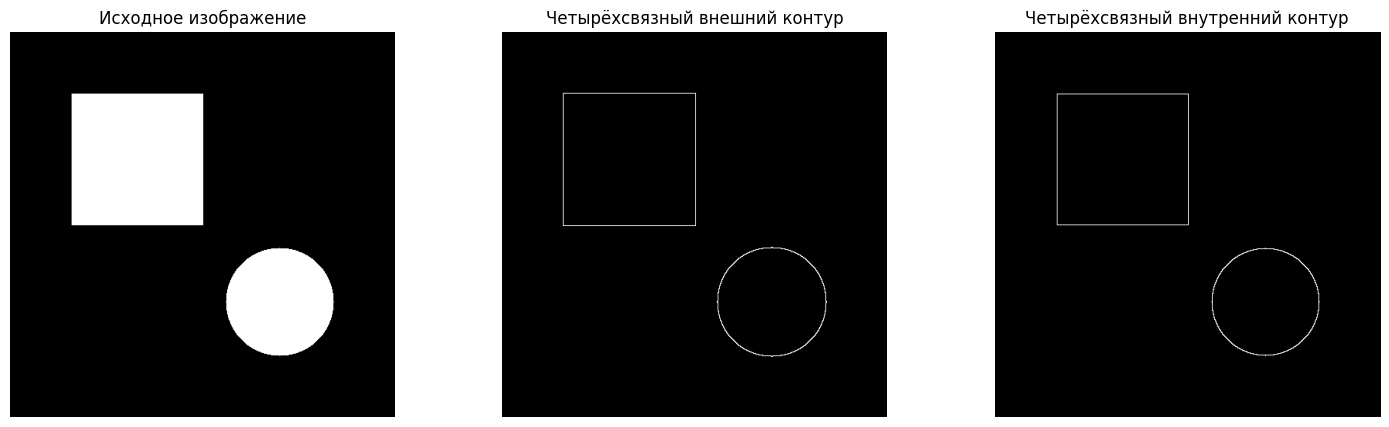

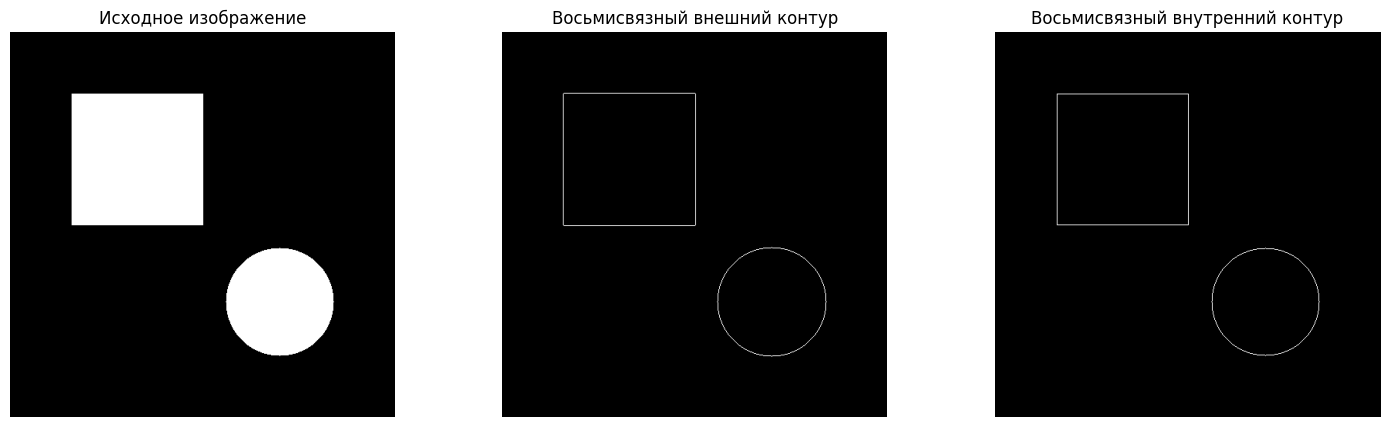

In [ ]:
#Четырёхсвязный контур
mask_4 = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]]) #используем маску такого вида

#внешний контур - дилатация, сложение по модулю 2
image_dil_4 = dilation(binary_image, mask_4)
external_countour_4 = np.logical_xor(binary_image, image_dil_4)

#внутренний контур - эрозия, сложение по модулю 2
image_ero_4 = erosion(binary_image, mask_4)
inner_countour_4 = np.logical_xor(binary_image, image_ero_4)

show_images(binary_image, external_countour_4, inner_countour_4, title='Исходное изображение',title_2='Четырёхсвязный внешний контур', title_3 = 'Четырёхсвязный внутренний контур')


#Восьмисвязный контур
mask_8 = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]) #используем маску такого вида

#внешний контур - дилатация, сложение по модулю 2
image_dil_8 = dilation(binary_image, mask_8)
external_countour_8 = np.logical_xor(binary_image, image_dil_8)

#внутренний контур - эрозия, сложение по модулю 2
image_ero_8 = erosion(binary_image, mask_8)
inner_countour_8 = np.logical_xor(binary_image, image_ero_8)

show_images(binary_image, external_countour_8, inner_countour_8, title='Исходное изображение',title_2='Восьмисвязный внешний контур', title_3 = 'Восьмисвязный внутренний контур')

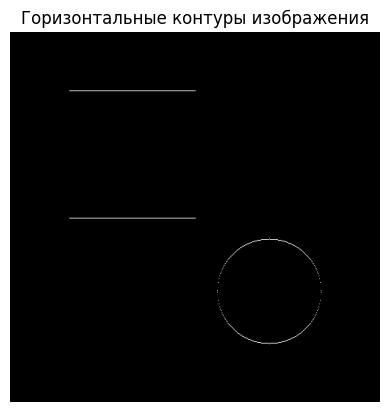

In [ ]:
# 8. На исходном изображении с помощью морфологических операций выделить горизонтальные и вертикальные контуры объекта.

window_1 = np.array([[0, 1, 0], [0, 1, 0], [0, 1, 0]])
img_dil = dilation(binary_image, window_1)
img_contour = np.logical_xor(binary_image, img_dil)
show_image(img_contour, 'Горизонтальные контуры изображения')

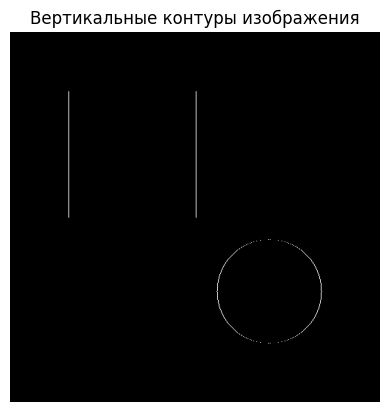

In [ ]:
window_2 = np.array([[0, 0, 0], [1, 1, 1], [0, 0, 0]])
img_dilation = dilation(binary_image, window_2)
img_contour = np.logical_xor(binary_image, img_dilation)
show_image(img_contour, 'Вертикальные контуры изображения')